In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,-999.0,150.0,discover,142.0,...,missing,-999.0,missing,missing,missing,missing,missing,missing,missing,missing
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,missing,-999.0,missing,missing,missing,missing,missing,missing,missing,missing
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,missing,-999.0,missing,missing,missing,missing,missing,missing,missing,missing
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,missing,-999.0,missing,missing,missing,missing,missing,missing,missing,missing
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


Fraud Distribution:
 isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64


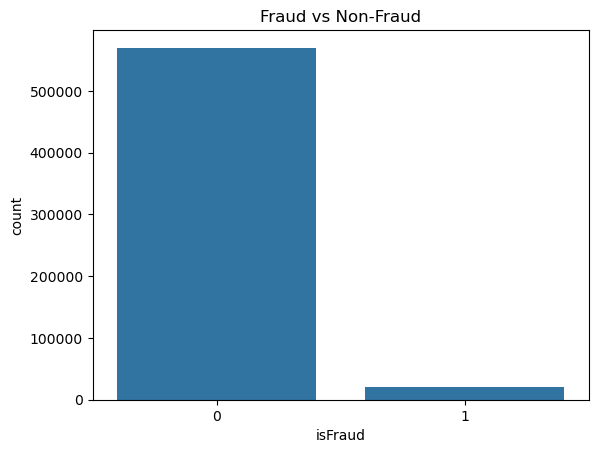

In [4]:
fraud_counts = df['isFraud'].value_counts(normalize=True)
print("Fraud Distribution:\n", fraud_counts)

sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Non-Fraud")
plt.show()


In [5]:
df['log_TransactionAmt'] = np.log1p(df['TransactionAmt'])

df['TransactionHour'] = (df['TransactionDT'] / 3600) % 24
df['TransactionHour'] = df['TransactionHour'].astype(int)

personal_domains = ['gmail.com', 'yahoo.com', 'hotmail.com']
df['P_emaildomain_group'] = df['P_emaildomain'].apply(
    lambda x: 'personal' if x in personal_domains else 'other'
)


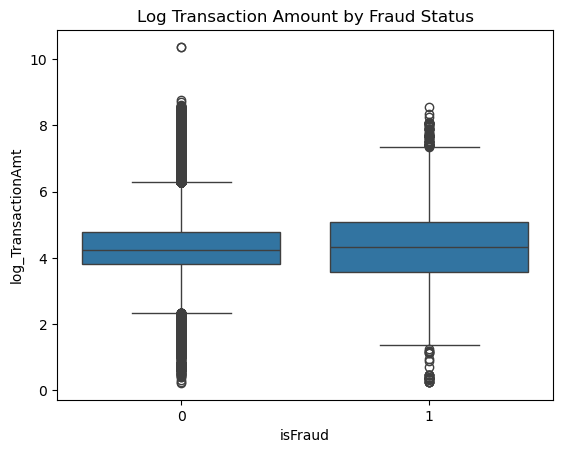

In [6]:
sns.boxplot(data=df, x='isFraud', y='log_TransactionAmt')
plt.title("Log Transaction Amount by Fraud Status")
plt.show()


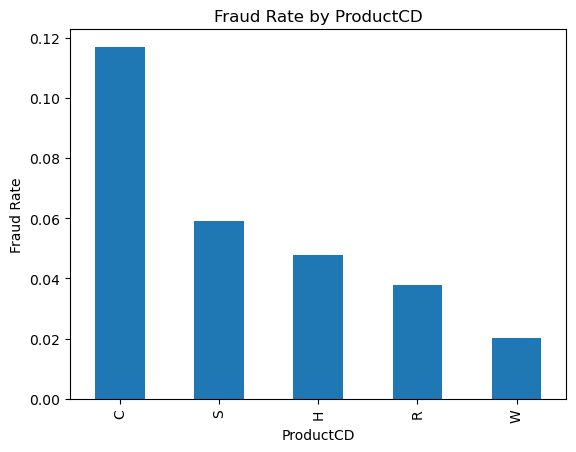

In [7]:
fraud_by_product = df.groupby('ProductCD')['isFraud'].mean().sort_values(ascending=False)
fraud_by_product.plot(kind='bar', title="Fraud Rate by ProductCD")
plt.ylabel("Fraud Rate")
plt.show()

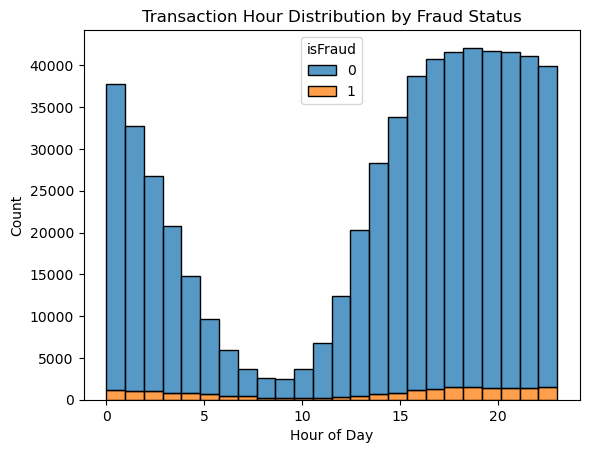

In [8]:
sns.histplot(data=df, x='TransactionHour', hue='isFraud', multiple='stack', bins=24)
plt.title("Transaction Hour Distribution by Fraud Status")
plt.xlabel("Hour of Day")
plt.show()